# TMDB Data analysis

First initialising the librabries.

In [430]:
%cd C:\Users\Nischay\Downloads\Data Sets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import ast, json
import seaborn as sns
from datetime import datetime

C:\Users\Nischay\Downloads\Data Sets


loading the dataset from the directory

In [431]:
df=pd.read_csv('movies.csv')
df.shape

(4803, 20)

In [432]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Removing the unused columns.Such as-
Homepage
id
keywords
original_language
oroginal_title
overview
production_companies
spoken_languages
tagline
title

In [433]:
df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 
                'overview', 'production_companies', 'original_title','id'],axis=1,inplace=True)
df

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",115.699814,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",155.790452,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Batman v Superman: Dawn of Justice,5.7,7004


Dropping the dupicate row entries if any.

In [434]:
df=df.drop_duplicates(keep='first')
df.shape

(4803, 11)

In the given dataset few entries in the budget and revenue column are 0,so we can discad those columns.

In [435]:
cols=['budget','revenue']
df[cols]=df[cols].replace(0,np.nan)

df.dropna(subset=cols,inplace=True)
df.shape

(3229, 11)

for easier analysis converting release date to date time format for yearwise analysis.

In [436]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date']=df['release_date'].dt.year
df.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


Coverting budget and revenue to int64 format.

In [437]:
cols=['budget','revenue']
df[cols]=df[cols].applymap(np.int64)
df.dtypes

budget                    int64
genres                   object
popularity              float64
production_countries     object
release_date              int64
revenue                   int64
runtime                 float64
spoken_languages         object
title                    object
vote_average            float64
vote_count                int64
dtype: object

Coverting the names in json to python.

In [438]:
def parse_col_json(column, key):
    for index,i in zip(df.index,df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

df.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",150.437577,"['United States of America', 'United Kingdom']",2009,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",139.082615,['United States of America'],2007,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",107.376788,"['United Kingdom', 'United States of America']",2015,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",112.312950,['United States of America'],2012,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",43.926995,['United States of America'],2012,284139100,132.0,['English'],John Carter,6.1,2124


In [439]:
expensive_movie=df.sort_values(by='budget',ascending=False)
expensive_movie.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
17,380000000,"['Adventure', 'Action', 'Fantasy']",135.413856,['United States of America'],2011,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948
1,300000000,"['Adventure', 'Fantasy', 'Action']",139.082615,['United States of America'],2007,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500
7,280000000,"['Action', 'Adventure', 'Science Fiction']",134.279229,['United States of America'],2015,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",57.925623,['United States of America'],2006,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400
4,260000000,"['Action', 'Adventure', 'Science Fiction']",43.926995,['United States of America'],2012,284139100,132.0,['English'],John Carter,6.1,2124


In [440]:
def find_min_max_in(col):
    top =df[col].idxmax()
    top_df = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bottom_df = pd.DataFrame(df.loc[bottom])
    
    info_df = pd.concat([top_df, bottom_df], axis=1)
    return info_df

find_min_max_in('budget')

,17,4238
budget,380000000,1
genres,"['Adventure', 'Action', 'Fantasy']","['Drama', 'Comedy']"
popularity,135.414,28.2765
production_countries,['United States of America'],['United States of America']
release_date,2011,1936
revenue,1045713802,8500000
runtime,136,87
spoken_languages,"['English', 'Español']",['English']
title,Pirates of the Caribbean: On Stranger Tides,Modern Times
vote_average,6.4,8.1


# top 5 profitable movies.

In [441]:
df['profit']=df['revenue']-df['budget']
profitable_movies=df.sort_values(by='profit',ascending=False)
profitable_movies.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",150.437577,"['United States of America', 'United Kingdom']",2009,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",100.025899,['United States of America'],1997,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",418.708552,['United States of America'],2015,1513528810,124.0,['English'],Jurassic World,6.5,8662,1363528810
44,190000000,['Action'],102.322217,"['Japan', 'United States of America']",2015,1506249360,137.0,['English'],Furious 7,7.3,4176,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",144.448633,['United States of America'],2012,1519557910,143.0,['English'],The Avengers,7.4,11776,1299557910


# Movies rated above 7.

In [442]:
df[df['vote_average'] >= 7.0]

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",150.437577,"['United States of America', 'United Kingdom']",2009,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",112.312950,['United States of America'],2012,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,834939099
6,260000000,"['Animation', 'Family']",48.681969,['United States of America'],2010,591794936,100.0,['English'],Tangled,7.4,3330,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",134.279229,['United States of America'],2015,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",98.885637,"['United Kingdom', 'United States of America']",2009,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,683959197
12,200000000,"['Adventure', 'Fantasy', 'Action']",145.847379,"['Jamaica', 'United States of America', 'Baham...",2006,1065659812,151.0,"['English', 'Türkçe', 'ελληνικά', '普通话']",Pirates of the Caribbean: Dead Man's Chest,7.0,5246,865659812
16,220000000,"['Science Fiction', 'Action', 'Adventure']",144.448633,['United States of America'],2012,1519557910,143.0,['English'],The Avengers,7.4,11776,1299557910
19,250000000,"['Action', 'Adventure', 'Fantasy']",120.965743,"['New Zealand', 'United States of America']",2014,956019788,144.0,['English'],The Hobbit: The Battle of the Five Armies,7.1,4760,706019788
22,250000000,"['Adventure', 'Fantasy']",94.370564,"['New Zealand', 'United States of America']",2013,958400000,161.0,['English'],The Hobbit: The Desolation of Smaug,7.6,4524,708400000
25,200000000,"['Drama', 'Romance', 'Thriller']",100.025899,['United States of America'],1997,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1645034188


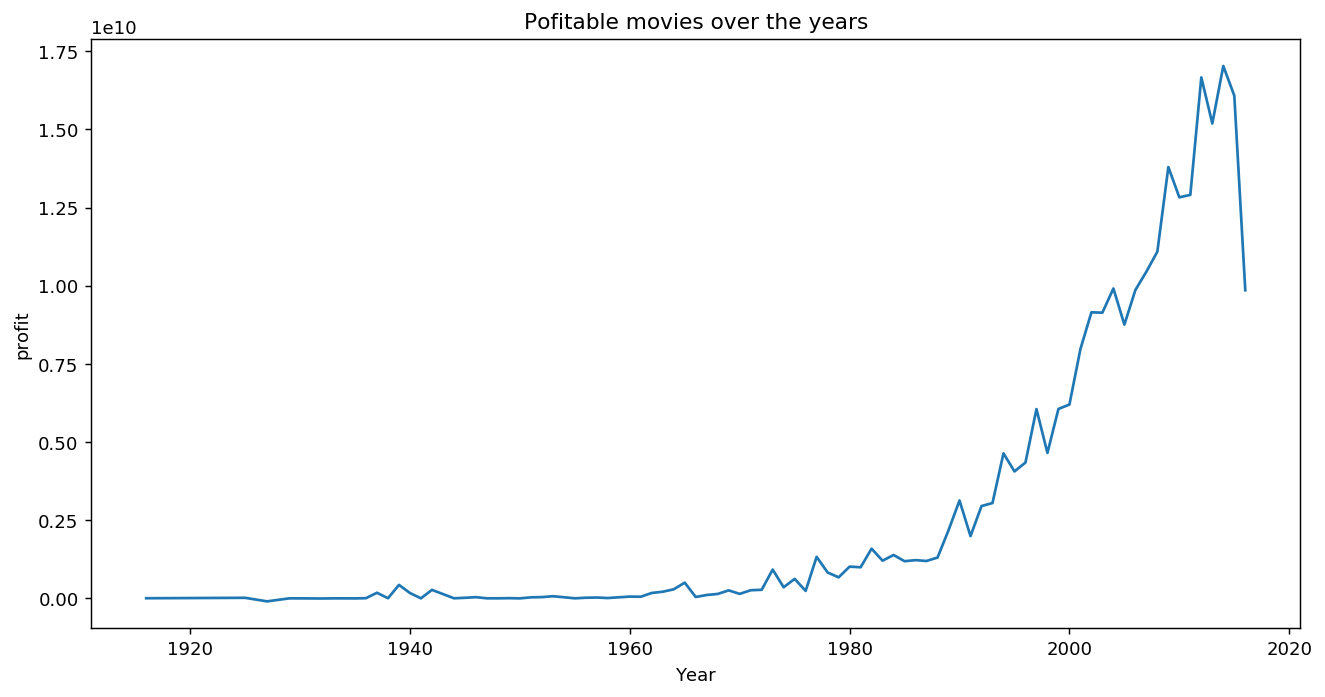

In [443]:
profit_year=df.groupby('release_date')['profit'].sum()
# profit_year
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Year')
plt.ylabel('profit')
plt.title('Pofitable movies over the years')
plt.plot(profit_year)
plt.show()

In [444]:
#most profitable year
profit_year.idxmax()

2014

# Most profitable genres.

In [445]:
#selecting the movies having profit $50M or more
profit_50 = df[df['profit'] >= 50000000]

#reindexing new data
profit_50.index = range(len(profit_data))

#we will start from 1 instead of 0

profit_50.index = profit_50.index + 1

#printing the changed dataset
profit_50.head(3)

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,profit
1,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",150.437577,"['United States of America', 'United Kingdom']",2009,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2550965087
2,300000000,"['Adventure', 'Fantasy', 'Action']",139.082615,['United States of America'],2007,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,661000000
3,245000000,"['Action', 'Adventure', 'Crime']",107.376788,"['United Kingdom', 'United States of America']",2015,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,635674609


In [446]:
profit_data['genres']=profit_data['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')

profit_data['genres']=profit_data['genres'].str.split(',')

profit_data.head()


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

TypeError: 'float' object is not iterable

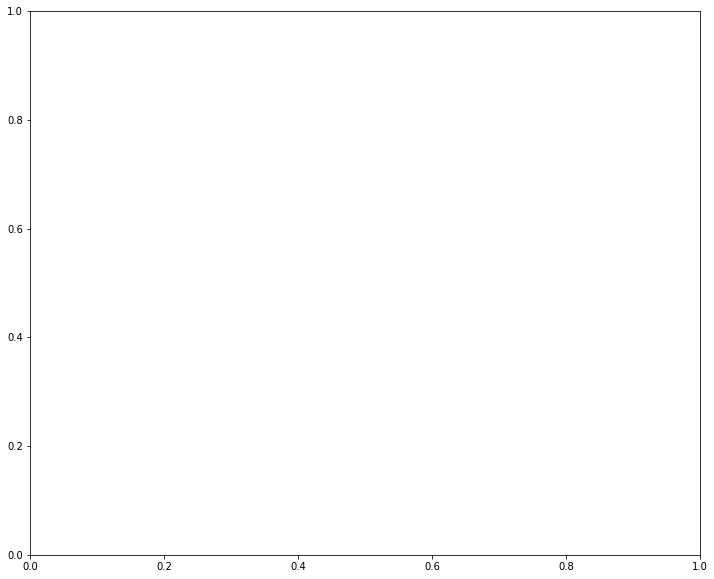

In [447]:
#PLot for genres

plt.subplots(figsize=(12,10))
list1=[]

# extending the list to 
for i in profit_data['genres']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Blues',10))

for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(1, i, v,fontsize=12,color='white')
    ax.patches[9].set_facecolor('r')
    
    
plt.title('Top Genres')
plt.show()